In [1]:
import numpy as np
import scipy.interpolate
from scipy import interpolate
import math
import matplotlib.pyplot as plt
import subprocess
from astropy.io import fits
from subprocess import Popen, PIPE
from mpl_toolkits.mplot3d import axes3d
from numpy import cos,sin
import h5py
import json

%matplotlib inline

In [2]:
spin=0.5;
d1=0;

#Observation angle, will be used to transform hbar to hTT 
PHI=0/180*np.pi  #azimuthal angle, in rad
THETA=45/180*np.pi  #latitude angle, in rad


In [ ]:
#calculate GW from geodesic, see file "Gwave.ipynb"
Nread=0

f=h5py.File("test.hdf5","r+")
#geo8RK4
for e in np.arange(0.4,0.6,0.01):
    for p in np.arange(5,7,0.1):

        print("e= %.6f, p=%.6f"%(e,p))
        try:
            index, tau,t,r,th,phi,ut,ur,uth,uphi,F_t,F_r,F_th,F_phi=np.loadtxt \
('C:\\Users\\HP\\Documents\\Visual Studio 2015\\Projects\\RK4geo8_dt\\RK4geo8_dt\
\\trace_spin%.6f_d1%.6f_e%.6f_p%.6f.dat'%(spin,d1,e,p),unpack=True)
        except:
            print('trace_spin%.6f_d1%.6f_e%.6f_p%.6f.dat  does not exist'%(spin,d1,e,p))
            continue
        
        if index[-1]<5000:
            print("skip unstable orbit")
            continue
        else:
            Nread=Nread+1
        print(Nread)
        #qseudo_flat spacetime
        x=[];
        y=[];
        z=[];
        t_tau_dot=[]
        z_tau_dot=[]
        y_tau_dot=[]
        x_tau_dot=[]
        z_t_dot=[]
        y_t_dot=[]
        x_t_dot=[]
        vr_tau_dot=[]
        vth_tau_dot=[]
        vphi_tau_dot=[]
        vx_tau_dot=[]
        vy_tau_dot=[]
        vz_tau_dot=[]
        x_t_2dot=[]
        y_t_2dot=[]
        z_t_2dot=[]


        for i in np.arange(index.size):
            x.append(r[i]*np.sin(th[i])*np.cos(phi[i]));
            y.append(r[i]*np.sin(th[i])*np.sin(phi[i]));
            z.append(r[i]*np.cos(th[i]));
            t_tau_dot.append(ut[i])
            x_tau_dot.append(ur[i]*np.sin(th[i])*np.cos(phi[i]) + r[i]*np.cos(th[i])*np.cos(phi[i])*uth[i] - r[i]*np.sin(th[i])*np.sin(phi[i])*uphi[i] )
            y_tau_dot.append(ur[i]*np.sin(th[i])*np.sin(phi[i]) + r[i]*np.cos(th[i])*np.sin(phi[i])*uth[i] + r[i]*np.sin(th[i])*np.cos(phi[i])*uphi[i] )
            z_tau_dot.append(ur[i]*np.cos(th[i]) - r[i]*np.sin(th[i])*uth[i])
            x_t_dot.append(x_tau_dot[i]/t_tau_dot[i])
            y_t_dot.append(y_tau_dot[i]/t_tau_dot[i])
            z_t_dot.append(z_tau_dot[i]/t_tau_dot[i])

            vr_tau_dot.append( (F_r[i]*t_tau_dot[i]-ur[i]*F_t[i])/t_tau_dot[i]/t_tau_dot[i] )
            vth_tau_dot.append( (F_th[i]*t_tau_dot[i]-uth[i]*F_t[i])/t_tau_dot[i]/t_tau_dot[i] )
            vphi_tau_dot.append( (F_phi[i]*t_tau_dot[i]-uphi[i]*F_t[i])/t_tau_dot[i]/t_tau_dot[i] )

            vx_tau_dot.append( vr_tau_dot[i]*np.sin(th[i])*np.cos(phi[i]) + ur[i]/ut[i]*np.cos(th[i])*np.cos(phi[i])*uth[i] - ur[i]/ut[i]*np.sin(th[i])*np.sin(phi[i])*uphi[i]\
                 + ur[i]*cos(th[i])*cos(phi[i])*uth[i]/ut[i] - r[i]*sin(th[i])*cos(phi[i])*uth[i]/ut[i]*uth[i] -r[i]*cos(th[i])*sin(phi[i])*uth[i]/ut[i]*uphi[i] +r[i]*cos(th[i])*cos(phi[i])*vth_tau_dot[i]  \
                 - ur[i]*sin(th[i])*sin(phi[i])*uphi[i]/ut[i] - r[i]*cos(th[i])*sin(phi[i])*uphi[i]/ut[i]*uth[i] - r[i]*sin(th[i])*cos(phi[i])*uphi[i]/ut[i]*uphi[i] - r[i]*sin(th[i])*sin(phi[i])*vphi_tau_dot[i])

            vy_tau_dot.append( vr_tau_dot[i]*np.sin(th[i])*np.sin(phi[i]) + ur[i]/ut[i]*np.cos(th[i])*np.sin(phi[i])*uth[i] + ur[i]/ut[i]*np.sin(th[i])*np.cos(phi[i])*uphi[i]\
                 + ur[i]*cos(th[i])*sin(phi[i])*uth[i]/ut[i] - r[i]*sin(th[i])*sin(phi[i])*uth[i]/ut[i]*uth[i] +r[i]*cos(th[i])*cos(phi[i])*uth[i]/ut[i]*uphi[i] +r[i]*cos(th[i])*sin(phi[i])*vth_tau_dot[i]  \
                 + ur[i]*sin(th[i])*cos(phi[i])*uphi[i]/ut[i] + r[i]*cos(th[i])*cos(phi[i])*uphi[i]/ut[i]*uth[i] - r[i]*sin(th[i])*sin(phi[i])*uphi[i]/ut[i]*uphi[i] + r[i]*sin(th[i])*cos(phi[i])*vphi_tau_dot[i])

            vz_tau_dot.append( vr_tau_dot[i]*cos(th[i]) -ur[i]/ut[i]*sin(th[i])*uth[i] \
                             -ur[i]*sin(th[i])*uth[i]/ut[i] -r[i]*cos(th[i])*uth[i]/ut[i]*uth[i] - r[i]*sin(th[i])*vth_tau_dot[i] )

            x_t_2dot.append(vx_tau_dot[i]/ut[i])
            y_t_2dot.append(vy_tau_dot[i]/ut[i])
            z_t_2dot.append(vz_tau_dot[i]/ut[i])

        print("derivative finished")
        #四极矩算法，在trace-reversed gauge的metric

        hbar_xx=[]
        hbar_yy=[]
        hbar_zz=[]
        hbar_xy=[]
        hbar_yz=[]
        hbar_xz=[]
        for i in np.arange(index.size):
            hbar_xx.append(4*(x_t_dot[i]*x_t_dot[i]+x[i]*x_t_2dot[i]))
            hbar_yy.append(4*(y_t_dot[i]*y_t_dot[i]+y[i]*y_t_2dot[i]))
            hbar_zz.append(4*(z_t_dot[i]*z_t_dot[i]+z[i]*z_t_2dot[i]))
            hbar_xy.append(2*(y[i]*x_t_2dot[i]+y_t_2dot[i]*x[i]+2*y_t_dot[i]*x_t_dot[i]))
            hbar_yz.append(2*(y[i]*z_t_2dot[i]+y_t_2dot[i]*z[i]+2*y_t_dot[i]*z_t_dot[i]))
            hbar_xz.append(2*(z[i]*x_t_2dot[i]+z_t_2dot[i]*x[i]+2*z_t_dot[i]*x_t_dot[i]))

        #由trace-reversed gauge转换到transverse traceless gauge


        hTT_TT=[]
        hTT_PP=[]
        hTT_TP=[]
        hTT_plus=[]
        hTT_cross=[]

        for i in np.arange(index.size):


            hTT_TT.append( np.cos(THETA)*np.cos(THETA)* (hbar_xx[i]*np.cos(PHI)*np.cos(PHI) + hbar_xy[i]*np.sin(2*PHI) + hbar_yy[i]*np.sin(PHI)*np.sin(PHI) )  +  hbar_zz[i]*np.sin(THETA)*np.sin(THETA)  -  np.sin(2*THETA)* (hbar_xz[i]*np.cos(PHI)+hbar_yz[i]*np.sin(PHI))  )
            hTT_TP.append( np.cos(THETA)* (-0.5*hbar_xx[i]*np.sin(2*PHI) + hbar_xy[i]*np.cos(2*PHI) + 0.5*hbar_yy[i]*np.sin(2*PHI))  +  np.sin(THETA)* (hbar_xz[i]*np.sin(PHI)-hbar_yz[i]*np.cos(PHI)) )
            hTT_PP.append( hbar_xx[i]*np.sin(PHI)*np.sin(PHI)  -  hbar_xy[i]*np.sin(2*PHI)  +  hbar_yy[i]*np.cos(PHI)*np.cos(PHI) )
            hTT_plus.append(0.5*(hTT_TT[i]-hTT_PP[i]))
            hTT_cross.append(hTT_TP[i])




        filename="/Kerr/tmp%08d"%(Nread)
        f[filename]=np.array(hTT_plus)+np.array(hTT_cross)*1j
        print(f[filename].dtype)
        print(filename)
        f[filename].attrs['e']=e
        f[filename].attrs['p']=p
        
        f[filename].attrs['r0']=p/(1-e)
        f[filename].attrs['spin']=spin
        f[filename].attrs['t0']=t[0]
        f[filename].attrs['phi0']=phi[0]
        f[filename].attrs['th0']=th[0]
        f[filename].attrs['ur0']=ur[0]
        f[filename].attrs['uth0']=uth[0]
        for i in f[filename].attrs:
            
            print(i+": %f"%(f[filename].attrs[i]))
f.close()

e= 0.400000, p=5.000000
416
derivative finished
complex128
/Kerr/tmp00000416
e: 0.400000
p: 5.000000
r0: 8.333333
spin: 0.500000
t0: 0.000000
phi0: 0.000000
th0: 1.570796
ur0: 0.000000
uth0: 0.000000
e= 0.400000, p=5.100000
417
derivative finished
complex128
/Kerr/tmp00000417
e: 0.400000
p: 5.100000
r0: 8.500000
spin: 0.500000
t0: 0.000000
phi0: 837.530369
th0: 1.570796
ur0: 0.000000
uth0: 0.000000
e= 0.400000, p=5.200000
418
derivative finished
complex128
/Kerr/tmp00000418
e: 0.400000
p: 5.200000
r0: 8.666667
spin: 0.500000
t0: 0.000000
phi0: 1628.559196
th0: 1.570796
ur0: 0.000000
uth0: 0.000000
e= 0.400000, p=5.300000
419
derivative finished
complex128
/Kerr/tmp00000419
e: 0.400000
p: 5.300000
r0: 8.833333
spin: 0.500000
t0: 0.000000
phi0: 2386.367243
th0: 1.570796
ur0: 0.000000
uth0: 0.000000
e= 0.400000, p=5.400000
420
derivative finished
complex128
/Kerr/tmp00000420
e: 0.400000
p: 5.400000
r0: 9.000000
spin: 0.500000
t0: 0.000000
phi0: 3111.666387
th0: 1.570796
ur0: 0.000000
uth0

complex128
/Kerr/tmp00000456
e: 0.420000
p: 5.000000
r0: 8.620690
spin: 0.500000
t0: 0.000000
phi0: 24959.494350
th0: 1.570796
ur0: 0.000000
uth0: 0.000000
e= 0.420000, p=5.100000
457
derivative finished
complex128
/Kerr/tmp00000457
e: 0.420000
p: 5.100000
r0: 8.793103
spin: 0.500000
t0: 0.000000
phi0: 25802.583253
th0: 1.570796
ur0: 0.000000
uth0: 0.000000
e= 0.420000, p=5.200000
458
derivative finished
complex128
/Kerr/tmp00000458
e: 0.420000
p: 5.200000
r0: 8.965517
spin: 0.500000
t0: 0.000000
phi0: 26591.144219
th0: 1.570796
ur0: 0.000000
uth0: 0.000000
e= 0.420000, p=5.300000
459
derivative finished
complex128
/Kerr/tmp00000459
e: 0.420000
p: 5.300000
r0: 9.137931
spin: 0.500000
t0: 0.000000
phi0: 27344.493510
th0: 1.570796
ur0: 0.000000
uth0: 0.000000
e= 0.420000, p=5.400000
460
derivative finished
complex128
/Kerr/tmp00000460
e: 0.420000
p: 5.400000
r0: 9.310345
spin: 0.500000
t0: 0.000000
phi0: 28064.904310
th0: 1.570796
ur0: 0.000000
uth0: 0.000000
e= 0.420000, p=5.500000
461


497
derivative finished
complex128
/Kerr/tmp00000497
e: 0.440000
p: 5.100000
r0: 9.107143
spin: 0.500000
t0: 0.000000
phi0: 50445.685267
th0: 1.570796
ur0: 0.000000
uth0: 0.000000
e= 0.440000, p=5.200000
498
derivative finished
complex128
/Kerr/tmp00000498
e: 0.440000
p: 5.200000
r0: 9.285714
spin: 0.500000
t0: 0.000000
phi0: 51232.216493
th0: 1.570796
ur0: 0.000000
uth0: 0.000000
e= 0.440000, p=5.300000
499
derivative finished
complex128
/Kerr/tmp00000499
e: 0.440000
p: 5.300000
r0: 9.464286
spin: 0.500000
t0: 0.000000
phi0: 51980.529566
th0: 1.570796
ur0: 0.000000
uth0: 0.000000
e= 0.440000, p=5.400000
500
derivative finished
complex128
/Kerr/tmp00000500
e: 0.440000
p: 5.400000
r0: 9.642857
spin: 0.500000
t0: 0.000000
phi0: 52694.462705
th0: 1.570796
ur0: 0.000000
uth0: 0.000000
e= 0.440000, p=5.500000
501
derivative finished
complex128
/Kerr/tmp00000501
e: 0.440000
p: 5.500000
r0: 9.821429
spin: 0.500000
t0: 0.000000
phi0: 53375.194209
th0: 1.570796
ur0: 0.000000
uth0: 0.000000
e= 0

derivative finished
complex128
/Kerr/tmp00000537
e: 0.460000
p: 5.100000
r0: 9.444444
spin: 0.500000
t0: 0.000000
phi0: 74767.964511
th0: 1.570796
ur0: 0.000000
uth0: 0.000000
e= 0.460000, p=5.200000
538
derivative finished
complex128
/Kerr/tmp00000538
e: 0.460000
p: 5.200000
r0: 9.629630
spin: 0.500000
t0: 0.000000
phi0: 75554.804581
th0: 1.570796
ur0: 0.000000
uth0: 0.000000
e= 0.460000, p=5.300000
539
derivative finished
complex128
/Kerr/tmp00000539
e: 0.460000
p: 5.300000
r0: 9.814815
spin: 0.500000
t0: 0.000000
phi0: 76298.382363
th0: 1.570796
ur0: 0.000000
uth0: 0.000000
e= 0.460000, p=5.400000
540
derivative finished
complex128
/Kerr/tmp00000540
e: 0.460000
p: 5.400000
r0: 10.000000
spin: 0.500000
t0: 0.000000
phi0: 77005.256340
th0: 1.570796
ur0: 0.000000
uth0: 0.000000
e= 0.460000, p=5.500000
541
derivative finished
complex128
/Kerr/tmp00000541
e: 0.460000
p: 5.500000
r0: 10.185185
spin: 0.500000
t0: 0.000000
phi0: 77678.175108
th0: 1.570796
ur0: 0.000000
uth0: 0.000000
e= 0.4

In [104]:
for key in f.keys():
    print(key)    
    print(f[key].name)
    g=f[key]
    for key2 in g.keys():
        print(key2)    
        print(g[key2].name)
    
f.close()

ValueError: Not a location id (Invalid object id)

In [110]:
for name in f:
    print(name)


ValueError: Not a location id (Invalid object id)

In [6]:
def printname(name):
    print(name)

f=h5py.File("test.hdf5","w") 
f.visit(printname)


In [46]:
f["/bar1/dset1/d1"].attrs['at2']=10

In [75]:
for i in f["/Kerr/tmp1"].attrs:
    print(i)
    print(f["/Kerr/tmp1"].attrs[i])

r0
20
E
0.968693
spin
0.5
t0
0
phi0
0
th0
1.57079632679
ur0
0
uth0
0


In [49]:
f["/bar1/dset1/d1"].shape

(100001,)

In [115]:

f=h5py.File("mytemplate.hdf5","r+") 
f.close()

In [2]:
print("1"+"%.6f"%(4))

14.000000


In [14]:
f.close()

In [7]:
f.keys()

KeysView(<HDF5 file "test.hdf5" (mode r+)>)

In [8]:
for i in f.keys():
    print(i)


In [9]:
f['Kerr']

KeyError: "Unable to open object (Object 'kerr' doesn't exist)"

In [13]:
T=[(1,2),(2,4)]

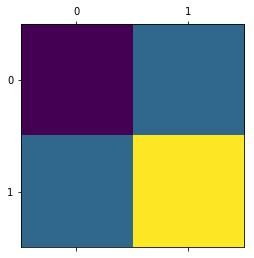

In [14]:
plt.matshow(T)

In [7]:
y=[(1,1),(2,2)]

In [8]:
x=[(1,2),(1,2)]

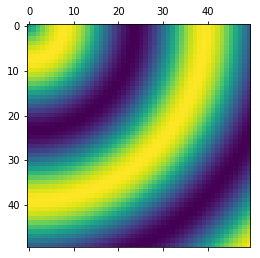

In [14]:
plt.matshow(T)
#plt.axis([13.5,14.5,13.5,14.5])

In [20]:
T=np.ndarray((20,20))

In [21]:
for i in np.arange(20):
    for j in np.arange(20):
        T[i,j]=i**2+j**2

In [4]:
24*3600/30

2880.0

In [5]:
np.sqrt(2880)

53.665631459994955

In [6]:
T=np.ndarray((50,50))

In [13]:
for i in np.arange(50):
    for j in np.arange(50):
        T[i][j]=np.sin(np.sqrt(i**2+j**2)/5)